In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_excel(r"C:\Users\kriti\Downloads\new\history_-1278697568.xlsx",parse_dates=['Date'])
data['Trend'] = data.reset_index().index+1
train=data[8784:26304] 
test=data[26304:35064]

In [3]:
data.head()

,Date,Hour,Temperature,Load,Unnamed: 4,Trend
0,2008-01-01,1.0,25.0,10737.0,NaN,1
1,2008-01-01,2.0,24.0,10348.0,NaN,2
2,2008-01-01,3.0,23.0,9997.0,NaN,3
3,2008-01-01,4.0,23.0,9760.0,NaN,4
4,2008-01-01,5.0,23.0,9624.0,NaN,5


In [4]:
df=train
df['day_of_week'] = pd.to_datetime(data['Date']).dt.day_name()
df['Month'] = pd.to_datetime(data['Date']).dt.month


C:\Users\kriti\AppData\Local\Temp\ipykernel_9460\3181578640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = pd.to_datetime(data['Date']).dt.day_name()
C:\Users\kriti\AppData\Local\Temp\ipykernel_9460\3181578640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.to_datetime(data['Date']).dt.month


In [5]:
df

,Date,Hour,Temperature,Load,Unnamed: 4,Trend,day_of_week,Month
8784,2009-01-01,1.0,17.00,11250.0,NaN,8785,Thursday,1.0
8785,2009-01-01,2.0,17.67,10820.0,NaN,8786,Thursday,1.0
8786,2009-01-01,3.0,18.67,10468.0,NaN,8787,Thursday,1.0
8787,2009-01-01,4.0,18.67,10190.0,NaN,8788,Thursday,1.0
8788,2009-01-01,5.0,19.33,10056.0,NaN,8789,Thursday,1.0
...,...,...,...,...,...,...,...,...
26299,2010-12-31,20.0,53.33,11585.0,NaN,26300,Friday,12.0
26300,2010-12-31,21.0,52.33,11243.0,NaN,26301,Friday,12.0
26301,2010-12-31,22.0,51.33,10825.0,NaN,26302,Friday,12.0
26302,2010-12-31,23.0,48.33,10511.0,NaN,26303,Friday,12.0


In [6]:
from statsmodels.formula.api import ols

res = ols('Load ~ Temperature + I(Temperature**2) + I(Temperature**3) + Trend + C(Hour) : C(day_of_week)+ C(Hour) + C(day_of_week) + C(Month) +  Temperature : C(Hour) + I(Temperature**2) : C(Hour) + I(Temperature**3) : C(Hour)  + Temperature : C(Month) + I(Temperature**2) : C(Month) + I(Temperature**3) : C(Month)  ', data=df).fit() 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Load   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     795.7
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:37:01   Log-Likelihood:            -1.3728e+05
No. Observations:               17520   AIC:                         2.751e+05
Df Residuals:                   17235   BIC:                         2.773e+05
Df Model:                         284                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    1.231e+04    142.187     86.544      0.000     1.2e+04    1.26e+04
C(Hour)[T.2.0]                               -469.4626    191.849     -2.447      0.014    -845.505     -93.420
C(Hour)[T.3.0]                               -770.0673    189.401     -4.066      0.000   -1141.313    -398.821
C(Hour)[T.4.0]                               -960.2059    187.014     -5.134      0.000   -1326.772    -593.640
C(Hour)[T.5.0]                              -1020.1060    184.755     -5.521      0.000   -1382.244    -657.968
C(Hour)[T.6.0]                               -821.8625    183.673     -4.475      0.000   -1181.881    -461.844
C(Hour)[T.7.0]                               -262.0750    182.011     -1.440      0.150    -618.835      94.685
C(Hour)[T.8.0]                                767.8455    184.080      4.171      0.000     407.031    1128.660
C(Hour)[T.9.0]                               1343.3274    192.361      6.983      0.000     966.280    1720.375
C(Hour)[T.10.0]                              1645.0400    210.472      7.816      0.000    1232.493    2057.587
C(Hour)[T.11.0]                              1797.8351    230.067      7.814      0.000    1346.881    2248.789
C(Hour)[T.12.0]                              1856.0014    245.985      7.545      0.000    1373.845    2338.157
C(Hour)[T.13.0]                              1732.4342    254.787      6.800      0.000    1233.026    2231.843
C(Hour)[T.14.0]                              1533.4529    259.513      5.909      0.000    1024.781    2042.125
C(Hour)[T.15.0]                              1431.9569    261.698      5.472      0.000     919.002    1944.912
C(Hour)[T.16.0]                              1296.4734    254.851      5.087      0.000     796.940    1796.007
C(Hour)[T.17.0]                              1251.8855    237.637      5.268      0.000     786.093    1717.678
C(Hour)[T.18.0]                              1713.6965    225.112      7.613      0.000    1272.454    2154.939
C(Hour)[T.19.0]                              2689.7092    217.613     12.360      0.000    2263.166    3116.252
C(Hour)[T.20.0]                              2516.8008    214.129     11.754      0.000    2097.086    2936.516
C(Hour)[T.21.0]                              2289.4481    210.601     10.871      0.000    1876.648    2702.248
C(Hour)[T.22.0]                              2048.2329    207.728      9.860      0.000    1641.065    2455.400
C(Hour)[T.23.0]                              1616.8725    203.258      7.955      0.000    1218.466    2015.280
C(Hour)[T.24.0]                               956.7144    208.677      4.585      0.000     547.685    1365.743
C(day_of_week)[T.Monday]                     -643.5364     

In [7]:
dt=test
dt['day_of_week'] = pd.to_datetime(data['Date']).dt.day_name()
dt['Month'] = pd.to_datetime(data['Date']).dt.month
dt

C:\Users\kriti\AppData\Local\Temp\ipykernel_9460\1234742726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['day_of_week'] = pd.to_datetime(data['Date']).dt.day_name()
C:\Users\kriti\AppData\Local\Temp\ipykernel_9460\1234742726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Month'] = pd.to_datetime(data['Date']).dt.month


,Date,Hour,Temperature,Load,Unnamed: 4,Trend,day_of_week,Month
26304,2011-01-01,1.0,39.33,9627.0,NaN,26305,Saturday,1.0
26305,2011-01-01,2.0,36.67,9268.0,NaN,26306,Saturday,1.0
26306,2011-01-01,3.0,35.33,9007.0,NaN,26307,Saturday,1.0
26307,2011-01-01,4.0,32.00,8737.0,NaN,26308,Saturday,1.0
26308,2011-01-01,5.0,29.67,8689.0,NaN,26309,Saturday,1.0
...,...,...,...,...,...,...,...,...
35059,2011-12-31,20.0,39.33,11812.0,NaN,35060,Saturday,12.0
35060,2011-12-31,21.0,39.33,11542.0,NaN,35061,Saturday,12.0
35061,2011-12-31,22.0,39.00,11149.0,NaN,35062,Saturday,12.0
35062,2011-12-31,23.0,39.33,10855.0,NaN,35063,Saturday,12.0


In [8]:
ypred = res.predict(dt)
ypred

26304    10808.508101
26305    10377.530026
26306    10088.628867
26307    10026.675304
26308    10038.768500
             ...     
35059    11528.368731
35060    11582.128341
35061    11602.943718
35062    11311.318114
35063    10836.585720
Length: 8760, dtype: float64

In [9]:
dt.shape
df.shape

(17520, 8)

In [10]:
y_true = np.array(test['Load'])
y_pred = np.array(ypred)
ape = np.abs((y_true - y_pred) / y_true)
ape[np.isinf(ape)] = np.nan
mape = np.nanmean(ape) * 100
mape

4.287943133955732

Text(0, 0.5, 'Load')

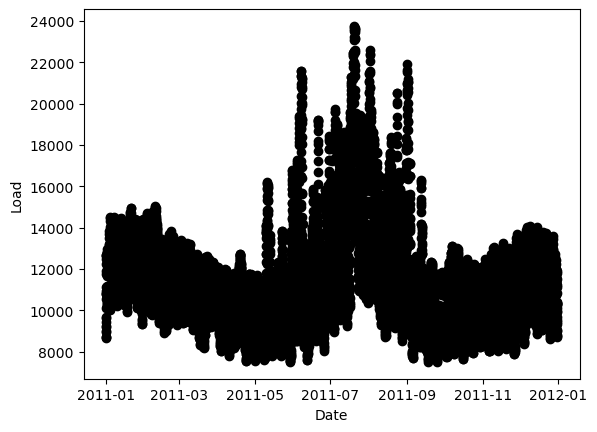

In [11]:
X = dt[["Date"]]
y = y_true


plt.scatter(X, y, c = "black")
plt.xlabel("Date")
plt.ylabel("Load")

Text(0, 0.5, 'Load')

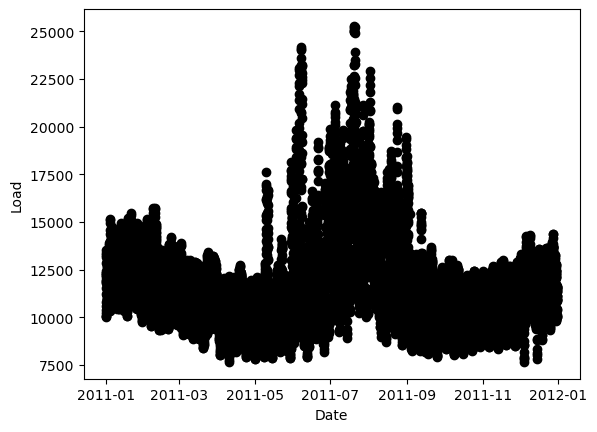

In [12]:
X = dt[["Date"]]
y = y_pred


plt.scatter(X, y, c = "black")
plt.xlabel("Date")
plt.ylabel("Load")

Text(0, 0.5, 'Load')

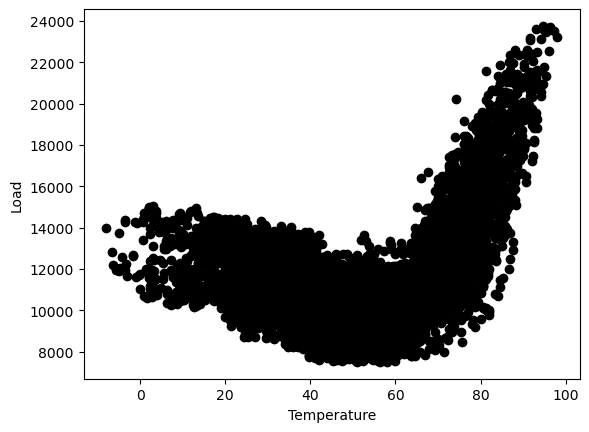

In [13]:
X = dt[["Temperature"]]
y = y_true


plt.scatter(X, y, c = "black")
plt.xlabel("Temperature")
plt.ylabel("Load")

Text(0, 0.5, 'Load')

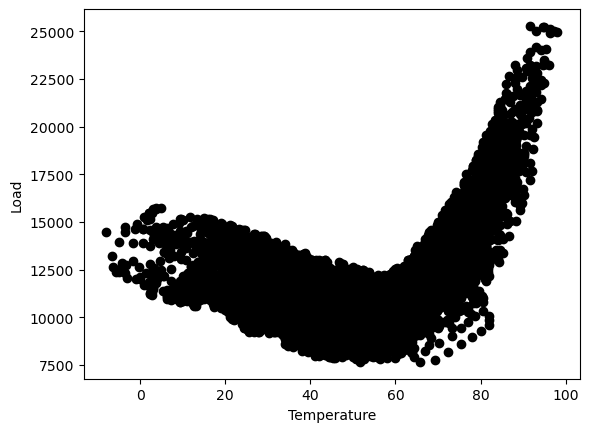

In [14]:
X = dt[["Temperature"]]
y = y_pred


plt.scatter(X, y, c = "black")
plt.xlabel("Temperature")
plt.ylabel("Load")


In [15]:
dn = pd.read_excel(r"C:\Users\kriti\Downloads\fcst (2).xlsx")
dn


,Unnamed: 0,Date,Hour,Temperature,Load,day_of_week,Month,Trend,Pred_load
0,0,2012-01-01,1,39.33,NaN,Tuesday,1,35064,10379.033425
1,1,2012-01-01,2,40.33,NaN,Tuesday,1,35065,9782.118370
2,2,2012-01-01,3,39.67,NaN,Tuesday,1,35066,9479.424703
3,3,2012-01-01,4,42.33,NaN,Tuesday,1,35067,9218.241504
4,4,2012-01-01,5,43.00,NaN,Tuesday,1,35068,9173.046144
...,...,...,...,...,...,...,...,...,...
8779,8779,2012-12-31,20,22.33,NaN,Wednesday,12,43843,14134.961190
8780,8780,2012-12-31,21,20.67,NaN,Wednesday,12,43844,14032.762636
8781,8781,2012-12-31,22,19.67,NaN,Wednesday,12,43845,13753.638122
8782,8782,2012-12-31,23,19.33,NaN,Wednesday,12,43846,13205.065666


In [16]:
dn['day_of_week'] = pd.to_datetime(data['Date']).dt.day_name()
dn['Month'] = pd.to_datetime(data['Date']).dt.month
num_rows = 8784
dn['Trend'] = range(35064, 35064 + num_rows)
dn

,Unnamed: 0,Date,Hour,Temperature,Load,day_of_week,Month,Trend,Pred_load
0,0,2012-01-01,1,39.33,NaN,Tuesday,1,35064,10379.033425
1,1,2012-01-01,2,40.33,NaN,Tuesday,1,35065,9782.118370
2,2,2012-01-01,3,39.67,NaN,Tuesday,1,35066,9479.424703
3,3,2012-01-01,4,42.33,NaN,Tuesday,1,35067,9218.241504
4,4,2012-01-01,5,43.00,NaN,Tuesday,1,35068,9173.046144
...,...,...,...,...,...,...,...,...,...
8779,8779,2012-12-31,20,22.33,NaN,Wednesday,12,43843,14134.961190
8780,8780,2012-12-31,21,20.67,NaN,Wednesday,12,43844,14032.762636
8781,8781,2012-12-31,22,19.67,NaN,Wednesday,12,43845,13753.638122
8782,8782,2012-12-31,23,19.33,NaN,Wednesday,12,43846,13205.065666


Text(0, 0.5, 'Load')

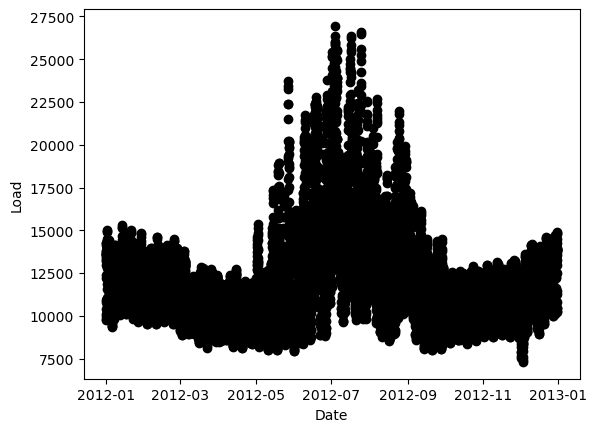

In [17]:
y_new_pred = res.predict(dn)
y_new_pred

X = dn[["Date"]]
y = y_new_pred


plt.scatter(X, y, c = "black")
plt.xlabel("Date")
plt.ylabel("Load")


In [18]:
dn['Pred_load'] =y_new_pred

In [19]:
dn

,Unnamed: 0,Date,Hour,Temperature,Load,day_of_week,Month,Trend,Pred_load
0,0,2012-01-01,1,39.33,NaN,Tuesday,1,35064,10955.309241
1,1,2012-01-01,2,40.33,NaN,Tuesday,1,35065,10400.887263
2,2,2012-01-01,3,39.67,NaN,Tuesday,1,35066,10105.581172
3,3,2012-01-01,4,42.33,NaN,Tuesday,1,35067,9806.463252
4,4,2012-01-01,5,43.00,NaN,Tuesday,1,35068,9753.245831
...,...,...,...,...,...,...,...,...,...
8779,8779,2012-12-31,20,22.33,NaN,Wednesday,12,43843,14894.594140
8780,8780,2012-12-31,21,20.67,NaN,Wednesday,12,43844,14796.321400
8781,8781,2012-12-31,22,19.67,NaN,Wednesday,12,43845,14467.161008
8782,8782,2012-12-31,23,19.33,NaN,Wednesday,12,43846,13889.192293


In [36]:
dn.to_excel(r"C:\Users\kriti\Downloads\fcst (2).xlsx")